# Computational Programming with Python
### Lecture 13: Time complexity, decorators and iterators

### Center for Mathematical Sciences, Lund University
Lecturer: Claus Führer, Malin Christersson, Robert Klöfkorn


# This lecture

- Time complexity
- Decorators
- The timeit module
- Iterators

# Time complexity

The estimated time of an algorithm should be independent of

- the programming language used to implement the algorithm
- the computer/OS used when implementing the algorithm

## Example: estimating the time

Consider this program:

```python
from numpy import *      # c1

def func(x, n):      
    y = x + 10           # c2
    y = 2.5*y            # c3
    for i in range(n):
        y =  sqrt(y+1)   # c4
    return y

a = func(3.5, 100)       # c5
```

Assume that all single operations take constant time $c_i$, then

$$T(n) = c_1 + c_5 + c_2 + c_3 + n\cdot c_4 = a + b\cdot n $$

is a function of the estimated time depending on $n$. 

## Asymptotic notation

We can measure the asymptotic growth of a function, thus not having to use constants.

#### Definition
An asymptotic upper bound is given by $O(f(n))$ where

$$O(f(n)) = \{g(n) : \text{ there exist positive constants } c \text{ and } n_0 \text{ such that } 0\le |g(n)| \le cf(n) \text{ for all } n \ge n_0 \}$$

#### Example

Let $T(n) = a+b\cdot n$ where $a$ and $b$ are positive constants, then $T(n)$ is $O(n)$ (or  $T(n) \in O(n)$).

If $n\ge 1$ then 
$$T(n) = a+b\cdot n \le a\cdot n+b \cdot n = (a+b)\cdot n$$

hence, we can use $n_0 = 1$ and $c = a+b$ in the definition.

## Using asymptotic notation

When using asymptotic notation for estimating time complexity, we can single out an operation as a **characteristic operation**, the operation that is performed the most number of times for large values of $n$.


Instead of estimating the time a **program** takes, we let $T(n)$ be the number of characteristic operations of an **algorithm**, given an input of size $n$. 


## Using asymptotic notation (cont)


```python
from numpy import *     

def func(x, n):      
    y = x + 10           
    y = 2.5*y            
    for i in range(n):
        y =  sqrt(y+1)   
    return y

a = func(3.5, 100)       
```

let `y=sqrt(y+1)` be the characteristic operation, let $T(n)$ be the number of times this operation is performed, then $T(n) = n$ and the time complexity of the program is $O(n)$.

$$ \begin{cases}
y_0 &= y0 \\
y_i &= \sqrt{y_{i-1}+1}, i = 1, 2, \ldots n
\end{cases}$$

## Nested loops

The three loops
```python

for i in range(n):
    # some operation
    
for i in range(n):
    for j in range(n):
        # some operation
        
for i in range(n):
    for j in range(n):
        for k in range(n):
            # some operation
```

have time complexities $O(n), O(n^2)$, and $O(n^3)$ respectively.

## Divide and conquer algorithms

Divide and conquer algorithms, such as the bisection method, has a logarithmic time complexity, e.g. $O(\log n)$ or $O(n\log n)$.


An example:

``` 
def solve_problem(....)
    divide the problem into two parts,
    solve each part recursively
```

If the input is a problem of size $n$, the worst case scenario is that we have to divide $n$ by $2$ until we get some singleton. We can do that $O(\log_2 n)$ times.

Since

$$\log_2(x) = \frac{\log_a(x)}{\log_a(2)} = constant \cdot \log_a(x) $$

the base of the logarithm doesn't matter when considering asymptotic growth, hence we use $O(\log n)$.

## A bad implementation of the Fibonacci sequence

$$
\begin{cases}
F_0 = 0 \\
F_1 = 1 \\
F_n = F_{n-1}+F_{n-2}
\end{cases}
$$

What is the time complexity of:

In [1]:
def bad_fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return bad_fib(n-1)+bad_fib(n-2)
    
for i in range(10):             #change it to 40
    print(bad_fib(i), end=' ')
print('done')

0 1 1 2 3 5 8 13 21 34 done


## Travelling Salesman Problem (TSP)

A salesman must visit $n$ cities. He must visit each city once and finish where he started. All distances between cities are known. What is the shortest possible route?

A brute force method is to try each possible route. This method has time complexity $O(n!)$.


### Comparison

For large values of $n$, we have that

$$ 1 \lt  \log n \lt n^k \lt 2^n \lt n! $$

In practical situations, an algorithm that takes $O(n^k)$ time, for some positive integer $k$ may be "too slow", if $k$ is large. 

In computer science, problems that take longer than polynomal time ($O(n^k)$) to solve, are considered 'hard' problems.


## P vs NP


**P** is the set of *decision problems* solvable by a *deterministic Turing Machine* in polynomial time. 

**NP** is the set of *decision problems* solvable by a *non-deterministic Turing Machine* in polynomial time.

If a problem is solvable by a *non-deterministic Turing Machine* in polynomial time, it means that a solution can be **verified** by a *deterministic Turing Machine* in polynomial time

**Example:** It is easier to verify that 3087547 is a factor of 21609905092991, than to factorize 21609905092991.

It is assumed that **P** &ne; **NP** but no one has been able to prove it. This is one of the Millenium Problems.

## Problems that are not solvable

In 1936, Alan Turing published a paper [On Computable Numbers, with an Application to the Entscheidungsproblem](https://londmathsoc.onlinelibrary.wiley.com/doi/epdf/10.1112/plms/s2-42.1.230).

In order to prove what a computer can do and cannot do, he defined what has later been called a **Turing machine**.

He then described what has later been called

**The Halting Problem**

&nbsp;&nbsp;&nbsp;&nbsp;*Given an arbitrary computer program and an input, decide whether the program will halt or run for ever.*

Then he proved that the halting problem cannot be solved by a Turing machine.

(The first **Turing complete** machine, Z3, was built in 1941 by Konrad Zuse.)


## Decorators

A decorator is a function that extends the functionality of another function. 

In [2]:
def decorator(func):
    def wrapper(*args, **kwargs):
        print("Before calling function.")
        val = func(*args, **kwargs)
        print("After calling function.")
        return val
    return wrapper

def f(x):
    print("Greetings from f(x)!")
    return x + 3

f = decorator(f)
a = f(1)
print(a) 

Before calling function.
Greetings from f(x)!
After calling function.
4


## Use the decorator function as a decorator

Instead of making the assignment:

```python
f = decorator(f)
```

we can use a decoration above the definition of `f`:

In [3]:
def decorator(func):
    def wrapper(*args, **kwargs):
        print("Before calling function.")
        val = func(*args, **kwargs)
        print("After calling function.")
        return val
    return wrapper

@decorator           # the same as: f = decorator(f)
def f(x):
    print("Greetings from f(x)!")
    return x + 3

a = f(1)
print(a)

Before calling function.
Greetings from f(x)!
After calling function.
4


## Functions are objects

Given a function `f`, you can use `dir(f)` to see the attributes. 

You can add attributes to a function.

In [4]:
def f(x):
    '''docstring of f(x)'''
    pass

f.message = 'Hello!'  #adding an attribute

print(f.message)
print(f.__name__)
print(f.__doc__)
print(45*'-')
help(f)

Hello!
f
docstring of f(x)
---------------------------------------------
Help on function f in module __main__:

f(x)
    docstring of f(x)



## The name and docstring using a decorator

In [5]:
@decorator
def f(x):
    '''The docstring of f(x)'''
    pass

def g(x):
    '''The docstring of g(x)'''
    pass

print(f.__name__)
print(f.__doc__)
print(45*'-')
print(g.__name__)
print(g.__doc__)

wrapper
None
---------------------------------------------
g
The docstring of g(x)


## The name and docstring using a decorator (cont)

In [6]:
from functools import wraps

def decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print("Before calling function.")
        val = func(*args, **kwargs)
        print("After calling function.")
        return val
    return wrapper

@decorator
def f(x):
    '''The docstring of f(x)'''
    pass

print(f.__name__)
print(f.__doc__)

f
The docstring of f(x)


## Example

We can make a decorator that takes the time:

In [7]:
import time
from numpy import *

def showtime(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        starttime = time.time()
        val = func(*args, **kwargs)
        print(f"It took {time.time()-starttime} seconds.")
        return val
    return wrapper


## Example (cont)

Consider the two functions:

In [ ]:
def shift_using_loop(vec):
    V = vec.copy()              # make a copy to keep vec intact
    n = len(V)
    for i in range(n-1, 0, -1): # We must do this in reverse order
        V[i] = V[i-1]
    return V

def shift_using_slices(vec):
    V = vec.copy()
    V[1:] = V[:-1]
    return V

n = 10

L = list(range(n))
L1 = shift_using_loop(L)
L2 = shift_using_slices(L)

A = array(list(range(n)))
A1 = shift_using_loop(A)
A2 = shift_using_slices(A)

print(L)
print(L1)

Given a list or a vector, the elements are shifted one step to the right. (Compare with shift-operators `>>` and `<<` on integers)

## Example (cont)


We can decorate the two functions.

In [8]:
@showtime
def shift_using_loop(vec):
    V = vec.copy()             
    n = len(V)
    for i in range(n-1, 0, -1): 
        V[i] = V[i-1]
    return V

@showtime
def shift_using_slices(vec):
    V = vec.copy()
    V[1:] = V[:-1]
    return V

n = 1000000

L = list(range(n))
L1 = shift_using_loop(L)
L2 = shift_using_slices(L)

A = array(list(range(n)))
A1 = shift_using_loop(A)
A2 = shift_using_slices(A)

It took 0.07575821876525879 seconds.
It took 0.024049997329711914 seconds.
It took 0.17315077781677246 seconds.
It took 0.0028657913208007812 seconds.


## Example (cont)

Instead of printing the time, we can return the value of the time as an attribute to the function.

In [9]:
def gettime(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        starttime = time.time()
        val = func(*args, **kwargs)
        t = time.time()-starttime
        wrapper.time = t
        return val
    return wrapper

@gettime
def using_loop(vec):
    V = vec.copy()             
    n = len(V)
    for i in range(n-1, 0, -1): 
        V[i] = V[i-1]
    return V

@gettime
def using_slices(vec):
    V = vec.copy()
    V[1:] = V[:-1]
    return V

using_slices(list(range(10)))
print(using_slices.time)       # the attribute is used on the function, not the function call

1.9073486328125e-06


## Example (cont)

Using the attribute `time`, we can make a plot for comparison.

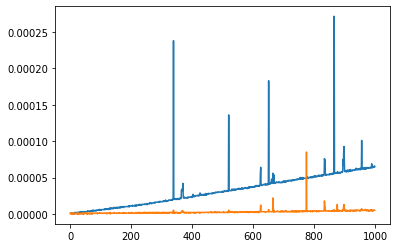

In [11]:
from matplotlib.pyplot import *

n = 1000
x = list(range(1, n))
y1 = []
y2 = []
for i in range(1, n):
    L = list(range(i))
    using_loop(L)
    y1.append(using_loop.time)
    using_slices(L)
    y2.append(using_slices.time)
    
plot(x, y1, x, y2)

## The `timeit` module

The `timeit` module is ideal for measuring execution time for short statements.

In [12]:
import timeit

print(67//2)
print(67>>1)  # shift right one step

t1 = timeit.timeit('67//2')
t2 = timeit.timeit('67>>2')
t3 = timeit.timeit('0.67**2')
t4 = timeit.timeit('0.67*0.67')
print("t1 =", t1)
print("t2 =", t2)
print("t3 =", t3)
print("t4 =", t4)

33
33
t1 = 0.006332751999991615
t2 = 0.006540002999997796
t3 = 0.0065215249999823754
t4 = 0.00649838500001465


## `stmt` and `setup` 

The `timeit`function has several keyword arguments.

```python
timeit.timeit(stmt='pass', setup='pass', number=1000000)
```

The `setup` is executed before the calculation of the time.

Comparing $3^2+4^2=5^2$ with $\sqrt{3^2+4^2}=5$:

In [13]:
t1 = timeit.timeit('3**2+4**2==5**2', number=10000)
t2 = timeit.timeit('sqrt(3**2+4**2)==5', setup='from numpy import sqrt', number=10000)
print(t1)
print(t2)

0.00019812300001831318
0.009957407000001695


## `stmt` and `setup` (cont)

If the functions `f1` and `f2` are saved in `testfile.py`, import from `testfile`.

Which function is fastest?

In [14]:
def f1():
    li = [i**2 for i in range(10000) if i%2==0]
    
def f2():
    li = []
    for i in range(10000):
        if i%2 == 0:
            li.append(i**2)
            
t1 = timeit.timeit('f1()', setup='from __main__ import f1', number=1000)
t2 = timeit.timeit('f2()', setup='from __main__ import f2', number=1000)
print(t1)
print(t2)

1.4009885289999886
1.563419921000019


For other `timeit` methods, consult the course book.

## Iterators

#### Definition: Iterable objects
An **iterable** object is an object that implements a special method `__iter__`, which is expected to return an iterator object. The iterator object can be used  in for loops.

#### Example
`range`is a typical iterator

#### Definition: Iterator
An **iterator** has a special method `__next__`.


## Iterator example

In [15]:
rg = range(3)        # iterable object
rgi = rg.__iter__()  # an iterator

print(rgi.__next__())
print(rgi.__next__())
print(rgi.__next__())
print(rgi.__next__())  # raises a StopIteration exception

0
1
2


StopIteration: 

Iterators can be exhausted. They exists as objects but are of no use any more in your program.

## Creating iterators

Creation of iterators is possible with the keyword `yield`.

In [16]:
def odd_numbers(n):
    '''generator for odd numbers less than n'''
    for k in range(1, n, 2):
        yield k

on = odd_numbers(10)

for odd in on:
    print(odd, end=' ')

1 3 5 7 9 

## Infinite iterators

Iterators can be infinite:

In [17]:
def odd_numbers():
    '''generator for odd numbers'''
    k = -1
    while True:
        k += 2
        yield k
        
on = odd_numbers()

for odd in on:
    if odd > 68:
        print(odd)
        break

69


## Another implementation of the Fibonacci sequence

In [18]:
def fib_numbers(n):
    a, b = 0, 1
    for i in range(n+1):
        yield a
        a, b = b, a + b
        
for nr in fib_numbers(10):  # change to 1000
    print(nr, end=' ')

0 1 1 2 3 5 8 13 21 34 55 

## Iterator tools

- `enumerate` is used to enumerate an iterable

In [19]:
A = ['a', 'b', 'c']
for i, x in enumerate(A):
    print(i, x, end=' : ')

0 a : 1 b : 2 c : 

- `reversed` creates an iterator from a list by going backwards

In [20]:
B = [0, 1, 2]
for elt in reversed(B):
    print(elt, end=' ')

2 1 0 

## Generator expressions

Just as we have **list comprehension**, there is also **generator comprehension** (generator creation without using `yield`).

In [21]:
my_gen = (n for n in range(0, 10000, 100))

for elt in my_gen:
    print(elt, end =' ')

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 